# Final Project - Customer Segmentation for Everything Plus

## 1 - Objective

Our objective in this project is to segment Everything Plus customers based on their purchasing habits. This should help us understand different consumer profiles and support the marketing team with useful insights to personalize offers and increase engagement.

## 2 - Justification

Based on the store’s transaction data, we will look for behavioral patterns that allow us to:
Group customers with similar characteristics;
Identify which profiles have the highest value for the company;
Support retention, reactivation, or cross-selling initiatives.


## 3 - Data Preprocessing

Before moving on to any deeper analysis or segmentation, it’s essential to ensure the data is clean, consistent, and ready to be used for modeling and clustering.
Preprocessing aims to solve common issues such as missing data, date inconsistencies, invalid values, and improper structures.

### 3.1 - Import libraries and load the data

In [1024]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading the dataset
df = pd.read_csv('../data/samples/ecommerce_dataset_us.csv', sep='\t')

# Checking general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [1025]:
# Viewing the first rows

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


**What was done:**
- The main libraries for data manipulation and visualization were imported.
- The dataset ecommerce_dataset_us.csv was loaded using tab (\t) as the separator.
- df.info() was used to understand the column structure, data types, and presence of missing values.
- df.head() was used to inspect the content of the first rows of the dataset.

**What we can conclude:**
- he dataset contains **541,909 records** and **7 columns**.
- Most columns are complete, except:
    - Description, which has 1,454 missing values.
    - CustomerID, which has 135,080 missing values (about 25% of the total).
- The InvoiceDate column is of type object, indicating it will need to be converted to datetime in the next step.
- The overall structure of the dataset seems appropriate, and the column names and values are consistent with typical e-commerce data (such as order number, product code, quantity, unit price, etc.).



### 3.2 - Fix data types and column names

In [1026]:
#  Copying the original DataFrame to keep a clean version
df_clean = df.copy()

# Renaming the columns manually using "_" between words
df_clean.columns = [
    'invoice_no',
    'stock_code',
    'description',
    'quantity',
    'invoice_date',
    'unit_price',
    'customer_id'
]

# Checking the updated column names
print("Standardized column names:")
print(df_clean.columns)

# Converting the 'invoice_date' column to datetime
df_clean['invoice_date'] = pd.to_datetime(df_clean['invoice_date'], errors='coerce')

# Checking the column type and first converted dates
print("\nTipo da coluna 'invoice_date':", df_clean['invoice_date'].dtype)
print("\nAmostra de datas:")
print(df_clean['invoice_date'].head())



Standardized column names:
Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

Tipo da coluna 'invoice_date': datetime64[ns]

Amostra de datas:
0   2018-11-29 08:26:00
1   2018-11-29 08:26:00
2   2018-11-29 08:26:00
3   2018-11-29 08:26:00
4   2018-11-29 08:26:00
Name: invoice_date, dtype: datetime64[ns]


**What was done:**

- A copy of the original DataFrame was created to preserve the raw data.
- Column names were standardized to lowercase, with words separated by underscores (_).
- The invoice_date column, originally of type object, was converted to datetime using pd.to_datetime().

**What we can conclude:**
- Standardizing column names makes working with them simpler and more consistent throughout the analysis.
- The invoice_date column was successfully converted to datetime64, allowing us to perform time-based analyses from this point on.
- The initial samples of the column indicate that the date data is in the correct format, with complete date and time information.

### 3.3 - Missing values analysis

In [1027]:
# Checking the structure of the cleaned DataFrame
print("General DataFrame information:\n")
df_clean.info()

# Checking missing values in each column
print("\nTotal number of missing values per column:\n")
print(df_clean.isnull().sum())

# Checking the percentage of missing values
print("\nPercentage of missing values per column:\n")
print((df_clean.isnull().mean() * 100).round(2))



General DataFrame information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB

Total number of missing values per column:

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64

Percentage of missing values per column:

invoice_no       0.00
stock_code       0.00
description

**What was done:**
- We used the methods info(), isnull().sum(), and isnull().mean() to identify the quantity and percentage of missing values in each column of the df_clean DataFrame.

**What we can conclude:**
- Most columns are complete.
- The description column has around 0.27% missing values — a very small proportion, likely without significant impact.
- The customer_id column has approximately 25% missing values. This issue needs to be addressed because it affects analyses involving customer identification.

### 3.4 - Handling missing values

In [1028]:
# Checking the original DataFrame size 
print(f"Total number of rows before cleaning: {df_clean.shape[0]}")

# Removing rows with missing customer_id
df_clean = df_clean.dropna(subset=['customer_id'])

# Removing rows with missing description
df_clean = df_clean.dropna(subset=['description'])

# Resetting the index after removals
df_clean = df_clean.reset_index(drop=True)

# Checking the final DataFrame size
print(f"Total number of rows after cleaning: {df_clean.shape[0]}")

# Checking for missing values again
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())



Total number of rows before cleaning: 541909
Total number of rows after cleaning: 406829

Missing values after cleaning:
invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64


**What was done:**
- All rows with missing values in the customer_id and description columns were removed.
- The DataFrame index was reset after deleting the rows.
- A new check was performed to confirm that no missing values remain.

**What we can conclude:**
- The dataset was reduced from 541,909 to 406,829 records after the cleaning process.
- All missing values were successfully removed, and the DataFrame is now fully complete.
- The dataset is more reliable and ready for analyses related to customers and products.

### 3.5 - Removal of invalid transactions

In [1029]:
# Checking the number of records with invalid quantity or price
print("Records with negative or zero quantity:", (df_clean['quantity'] <= 0).sum())
print("Records with negative or zero unit price:", (df_clean['unit_price'] <= 0).sum())

Records with negative or zero quantity: 8905
Records with negative or zero unit price: 40


In [1030]:
# Removing invalid records
df_clean = df_clean[(df_clean['quantity'] > 0) & (df_clean['unit_price'] > 0)]

# Resetting the index after removals
df_clean = df_clean.reset_index(drop=True)

# Displaying the final dataset size after cleaning
print(f"\nTotal number of rows after removing invalid transactions: {df_clean.shape[0]}")


Total number of rows after removing invalid transactions: 397884


**What was done:**
- We checked and identified 8,905 records with quantity less than or equal to zero and 40 records with unit_price less than or equal to zero.
- These records were removed from the DataFrame, as they do not represent valid transactions.
- The index was reset after the removals.

**What we can conclude:**
- After removing these invalid transactions, the total number of records was reduced from 406,829 to 397,884.
- The dataset now contains only transactions with positive quantity and price values, reflecting actual sales.
- This cleaning step ensures that future analyses are not skewed by inconsistent or incorrect data.

### 3.6 - Creating the total revenue column per order line

In [1031]:
# Creating the 'total_price' column with the total transaction value per line
df_clean['total_price'] = df_clean['quantity'] * df_clean['unit_price']

# Checking the first 5 rows to confirm
print(df_clean[['quantity', 'unit_price', 'total_price']].head())


   quantity  unit_price  total_price
0         6        2.55        15.30
1         6        3.39        20.34
2         8        2.75        22.00
3         6        3.39        20.34
4         6        3.39        20.34


**What was done:**
- A new column named total_price was created to represent the total revenue of each transaction line.
- The value was calculated by multiplying quantity by unit_price.

**What we can conclude:**
- The total_price column was successfully created and shows the correct values in the first few rows.
- This feature will be essential for monetary value analyses, both at the customer level and over different time periods.

### 3.7 - Extracting auxiliary date columns

In [1032]:
# Extracting auxiliary date columns
df_clean['year'] = df_clean['invoice_date'].dt.year
df_clean['month'] = df_clean['invoice_date'].dt.month
df_clean['day'] = df_clean['invoice_date'].dt.day
df_clean['weekday'] = df_clean['invoice_date'].dt.day_name()
df_clean['hour'] = df_clean['invoice_date'].dt.hour

# Viewing the first 5 rows with the new columns
print(df_clean[['invoice_date', 'year', 'month', 'day', 'weekday', 'hour']].head())



         invoice_date  year  month  day   weekday  hour
0 2018-11-29 08:26:00  2018     11   29  Thursday     8
1 2018-11-29 08:26:00  2018     11   29  Thursday     8
2 2018-11-29 08:26:00  2018     11   29  Thursday     8
3 2018-11-29 08:26:00  2018     11   29  Thursday     8
4 2018-11-29 08:26:00  2018     11   29  Thursday     8


**What was done:**
- Based on the invoice_date column, new auxiliary time-related columns were extracted to facilitate temporal analysis:
    - year: year of purchase
    - month: month of purchase
    - day: day of the month
    - weekday: day of the week (name)
    - hour: hour of the day


**What we can conclude:**
- The auxiliary columns were successfully extracted, enabling more detailed time-based segmentations.
- We can now analyze seasonality, customer behavior by weekday, and purchase time patterns more effectively.

### 3.8 - Duplicate records check

In [1033]:
# Checking for complete duplicate records
duplicatas = df_clean.duplicated().sum()
print(f"Total number of duplicate records: {duplicatas}")


Total number of duplicate records: 5192


**What was done:**

- A check was performed to identify duplicate records in the dataset after all previous data cleaning steps.

**What we can conclude:**

- No duplicate records were found, indicating that the dataset is well-structured.
- Since no duplicates were detected, no removal was necessary.


### 3.9 – Checking for out-of-range values

In [1034]:
# Checking descriptive statistics for numerical variables
print("Descriptive statistics:\n")
print(df_clean[['quantity', 'unit_price', 'total_price']].describe())

# Checking minimum and maximum dates
print("\nDate range:")
print("Minimum date:", df_clean['invoice_date'].min())
print("Maximum date:", df_clean['invoice_date'].max())


Descriptive statistics:

            quantity     unit_price    total_price
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488      22.397000
std       179.331775      22.097877     309.071041
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000

Date range:
Minimum date: 2018-11-29 08:26:00
Maximum date: 2019-12-07 12:50:00


**What was done:**

- Descriptive statistics were generated for the numerical columns quantity, unit_price, and total_price to identify unusually high values or patterns outside the expected range.
- The full date range of the invoice_date column was also checked to determine the minimum and maximum dates present in the dataset.

**What we can conclude:**

- Although the medians and quartiles indicate normal purchasing patterns (e.g., median quantity = 6 and median unit price = 1.95), the maximum values are extremely high:
    - quantity reaches 80,995 units in a single transaction.
    - unit_price reaches 8,142.75, far above the average.
    - total_price reaches 168,469.60, which may indicate very large orders or potential outliers.
- The date range is consistent, with records between 2018-11-29 and 2019-12-07, covering a little over one year of operations.
- Although these extreme values exist, they were not removed at this stage, as they may represent legitimate wholesale transactions. However, they should be carefully considered in subsequent analyses.

## 4 - Exploratory Data Analysis (EDA)

Before moving on to customer segmentation and hypothesis testing, it’s essential to understand the overall behavior of the transaction data.
In this stage, we’ll explore purchase patterns, sales volumes, and customer characteristics, identifying possible trends, skews, or outliers that may impact further analyses.

### 4.1 – Unique customers and transaction distribution per customer

In [1035]:
# Checking the number of unique customers
num_clientes = df_clean['customer_id'].nunique()
print(f"Total number of unique customers: {num_clientes}")

Total number of unique customers: 4338



Order count statistics per customer:
count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: num_pedidos, dtype: float64


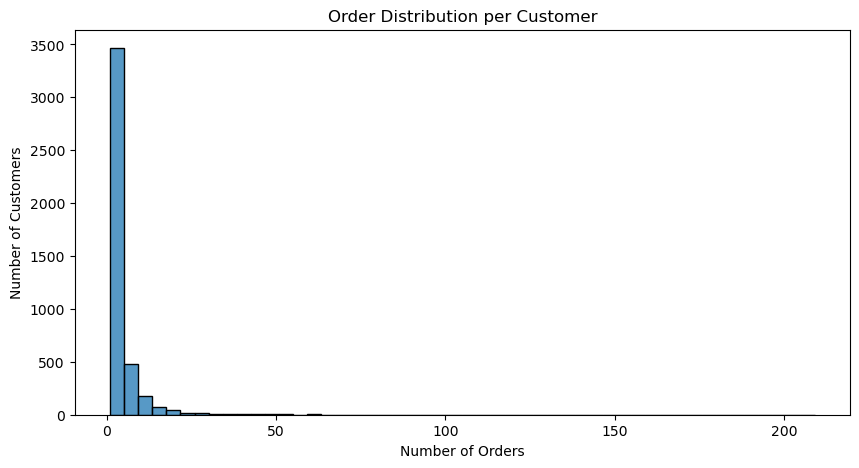

In [1036]:
# Grouping by customer and counting distinct orders (InvoiceNo)
pedidos_por_cliente = df_clean.groupby('customer_id')['invoice_no'].nunique().reset_index()
pedidos_por_cliente.columns = ['customer_id', 'num_pedidos']

# Viewing basic statistics of this distribution
print("\nOrder count statistics per customer:")
print(pedidos_por_cliente['num_pedidos'].describe())

# Plotting the distribution of number of orders per customer
plt.figure(figsize=(10, 5))
sns.histplot(pedidos_por_cliente['num_pedidos'], bins=50, kde=False)
plt.title('Order Distribution per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

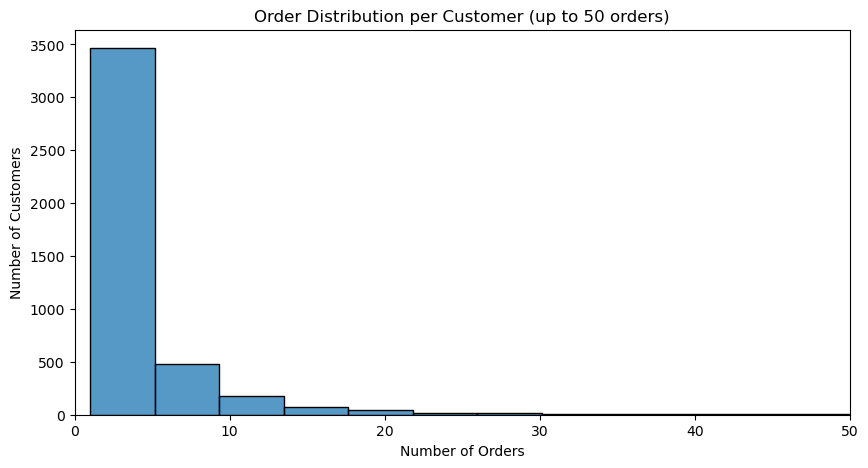

In [1037]:
# Plotting again with a limited x-axis to improve visualization
plt.figure(figsize=(10, 5))
sns.histplot(pedidos_por_cliente['num_pedidos'], bins=50, kde=False)
plt.title('Order Distribution per Customer (up to 50 orders)')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xlim(0, 50)
plt.show()

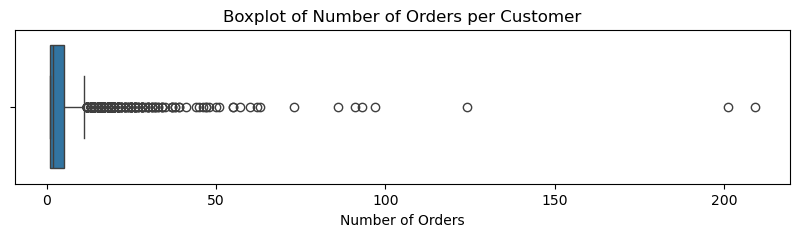

In [1038]:
# Plotting boxplot to check for outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=pedidos_por_cliente['num_pedidos'])
plt.title('Boxplot of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.show()


**What was done:**

- First, the total number of unique customers was calculated, identifying 4,338 distinct customers.
- Then, the data was grouped by customer_id and the number of unique orders (InvoiceNo) for each customer was counted.
- A full histogram was generated to visualize the overall distribution of orders per customer.
- Due to the strong skew and concentration in a few orders, a second histogram with a limited x-axis (up to 50) was created to better display the majority of cases.
- Finally, a boxplot was added to highlight outliers and analyze the data dispersion more clearly.

**What we can conclude:**

- The vast majority of customers place few orders: the median is only 2 orders, and 75% of customers place up to 5 orders.
- There is a long tail in the distribution: some customers placed up to 209 orders, which is significantly higher than the average.
- The second histogram (limited to 50 on the x-axis) was essential to highlight the behavior of the majority of the base, which was compressed in the original plot.
- The boxplot confirms the presence of significant outliers in purchasing behavior. Although few, these high-order-volume customers may represent a strategic segment (e.g., resellers).
- At this stage, outliers were kept in the dataset, as they may reflect legitimate and relevant behaviors for future segmentation.

### 4.2 - Average order value analysis per customer

Descriptive statistics for Average Order Value per customer:
count     4338.000000
mean       419.166289
std       1796.537944
min          3.450000
25%        178.625000
50%        293.900000
75%        430.113750
max      84236.250000
Name: average_order_value, dtype: float64


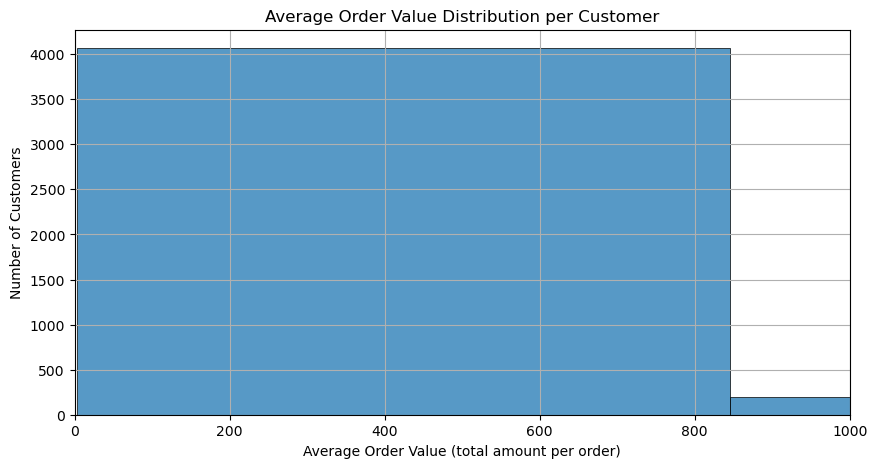

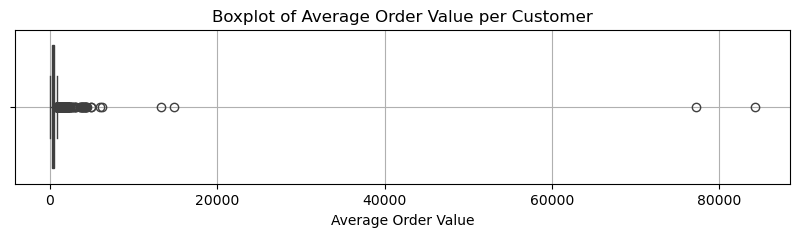

In [1039]:
# Grouping by customer and calculating key metrics
df_clientes = df_clean.groupby('customer_id').agg({
    'invoice_no': 'nunique',      # frequency (number of unique orders)
    'quantity': 'sum',           # total quantity of items purchased
    'total_price': 'sum'         # total amount spent
}).reset_index()

# Renaming columns
df_clientes.columns = ['customer_id', 'frequency', 'total_items', 'total_value']

# Calculating the Average Order Value (AOV)
df_clientes['average_order_value'] = df_clientes['total_value'] / df_clientes['frequency']

# Descriptive statistics for AOV per customer
print("Descriptive statistics for Average Order Value per customer:")
print(df_clientes['average_order_value'].describe())

# Histogram focusing visually up to R$1000
plt.figure(figsize=(10, 5))
sns.histplot(df_clientes['average_order_value'], bins=100, kde=False)
plt.title('Average Order Value Distribution per Customer')
plt.xlabel('Average Order Value (total amount per order)')
plt.ylabel('Number of Customers')
plt.xlim(0, 1000)  # Focus on the most frequent values
plt.grid(True)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_clientes['average_order_value'])
plt.title('Boxplot of Average Order Value per Customer')
plt.xlabel('Average Order Value')
plt.grid(True)
plt.show()



**What was done:**
- The data was grouped by customer (customer_id) and the following behavioral metrics were calculated:
    - Purchase frequency (number of unique orders);
    - Total quantity of items purchased;
    - Total amount spent per customer;
    - Average Order Value (AOV), computed as the ratio between total amount and frequency.
- A descriptive statistical analysis was then performed on the average_order_value variable.
- To better understand the distribution of this variable, two plots were created:
    - A histogram focused on the most frequent values (up to R$1000);
    - A boxplot to highlight the presence of outliers and data dispersion.

**What we can conclude:**
- Most customers have a relatively low average order value: 50% spend up to approximately R$291 per order (median).
- The histogram shows a strong concentration in lower values, which justifies the visual limit of R$1000 on the chart.
- The boxplot reveals a highly skewed distribution, with multiple outliers — the maximum value exceeds R$84,000 per order, indicating atypical cases.
- Customers with extremely high AOV may represent corporate buyers, resellers, or specific situations that deserve differentiated attention in subsequent analyses.


### 4.3 - Top-selling products analysis (by units sold)

                             description  quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
1762             JUMBO BAG RED RETROSPOT     46181
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725
216        ASSORTED COLOUR BIRD ORNAMENT     35362
2269     PACK OF 72 RETROSPOT CAKE CASES     33693
2600                      POPCORN HOLDER     30931
2656                  RABBIT NIGHT LIGHT     27202
2047             MINI PAINT SET VINTAGE      26076


C:\Users\marce\AppData\Local\Temp\ipykernel_35076\2526795415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_produtos, x='quantity', y='description', palette='Blues_r')


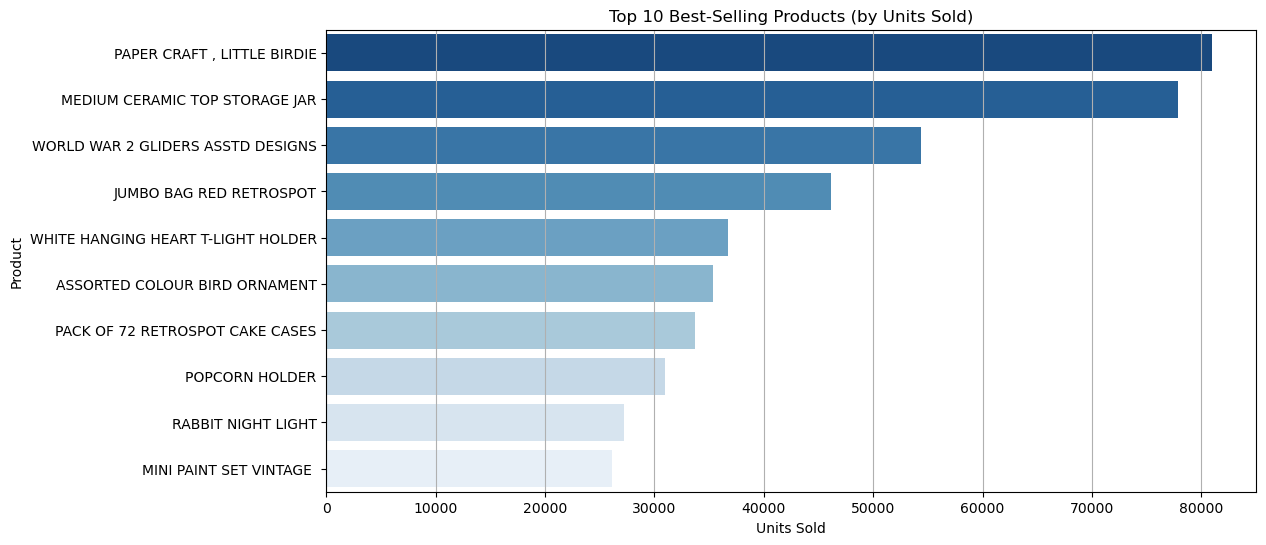

In [1040]:
# Grouping by product (description) and summing total units sold
produtos_mais_vendidos = df_clean.groupby('description')['quantity'].sum().reset_index()

# Sorting from most to least sold
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='quantity', ascending=False)

# Viewing the top 10 best-selling products
top_10_produtos = produtos_mais_vendidos.head(10)
print(top_10_produtos)

# Plotting a horizontal bar chart of the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_produtos, x='quantity', y='description', palette='Blues_r')
plt.title('Top 10 Best-Selling Products (by Units Sold)')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.grid(True, axis='x')
plt.show()



**What was done:**
- The data was grouped by product name (description) and the total number of units sold (quantity) was summed for each item.
- Products were then sorted in descending order based on total sales volume, and the top 10 best-selling items were selected.
- Finally, a horizontal bar chart was created to clearly visualize the products with the highest sales volumes.

**What we can conclude:**

- The top-selling products by quantity were mostly low unit-price items, which is common for wholesale-focused stores or businesses selling gifts and decorative products.
- The best-selling item was “PAPER CRAFT , LITTLE BIRDIE” with 80,995 units, followed by “MEDIUM CERAMIC TOP STORAGE JAR” and “WORLD WAR 2 GLIDERS ASSTD DESIGNS”.
- These insights reveal which products have the highest inventory turnover, highlighting opportunities for promotions, priority restocking, or pricing strategy adjustments.

### 4.4 – Top revenue-generating products analysis


                             description  total_price
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142592.95
3698  WHITE HANGING HEART T-LIGHT HOLDER    100448.15
1762             JUMBO BAG RED RETROSPOT     85220.78
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73
2611                             POSTAGE     77803.96
2345                       PARTY BUNTING     68844.33
216        ASSORTED COLOUR BIRD ORNAMENT     56580.34
2130                              Manual     53779.93
2656                  RABBIT NIGHT LIGHT     51346.20


C:\Users\marce\AppData\Local\Temp\ipykernel_35076\3324793747.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_lucratividade, x='total_price', y='description', palette='Greens_r')


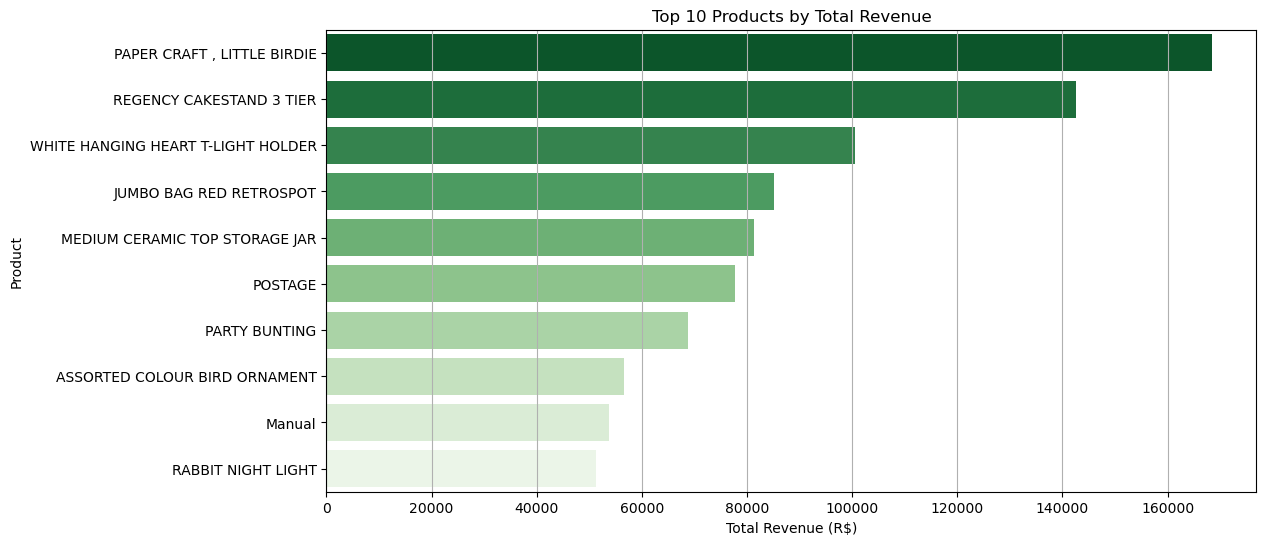

In [1041]:
# Grouping by product and summing total revenue generated by each
produtos_mais_lucrativos = df_clean.groupby('description')['total_price'].sum().reset_index()

# Sorting from highest to lowest revenue
produtos_mais_lucrativos = produtos_mais_lucrativos.sort_values(by='total_price', ascending=False)

# Selecting the top 10 products by total revenue
top_10_lucratividade = produtos_mais_lucrativos.head(10)
print(top_10_lucratividade)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_lucratividade, x='total_price', y='description', palette='Greens_r')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue (R$)')
plt.ylabel('Product')
plt.grid(True, axis='x')
plt.show()



**What was done:**
- The data was grouped by product name (description), and the total revenue (total_price) for each product was calculated.
- Products were then sorted from highest to lowest total revenue, and the top 10 items were selected.
- Finally, a horizontal bar chart was created to clearly visualize the products that generated the most revenue for the company.

**What we can conclude:**
- The top revenue-generating product was “PAPER CRAFT , LITTLE BIRDIE”, with a total of R$168,469.60.
- Other standout products included “REGENCY CAKESTAND 3 TIER” and “WHITE HANGING HEART T-LIGHT HOLDER”, both of which also showed strong sales performance.
- Interestingly, not all of the top-selling products by volume appear here, suggesting that some lower-volume but higher unit-price items had a significant impact on revenue.
- These insights are valuable for prioritizing strategic products in marketing campaigns and inventory restocking decisions.

### 4.5 - Análise de produtos com maior preço unitário

                             description  unit_price
1036                      DOTCOM POSTAGE  744.147500
2395      PICNIC BASKET WICKER 60 PIECES  649.500000
2130                              Manual  175.291585
2885  RUSTIC  SEVENTEEN DRAWER SIDEBOARD  158.076923
2769        REGENCY MIRROR WITH SHUTTERS  156.428571
3555        VINTAGE BLUE KITCHEN CABINET  146.750000
3604         VINTAGE RED KITCHEN CABINET  143.421053
689        CHEST NATURAL WOOD 20 DRAWERS  118.076923
1932       LOVE SEAT ANTIQUE WHITE METAL  114.024390
3600         VINTAGE POST OFFICE CABINET   66.360000


C:\Users\marce\AppData\Local\Temp\ipykernel_35076\2616200249.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_precos, x='unit_price', y='description', palette='Oranges_r')


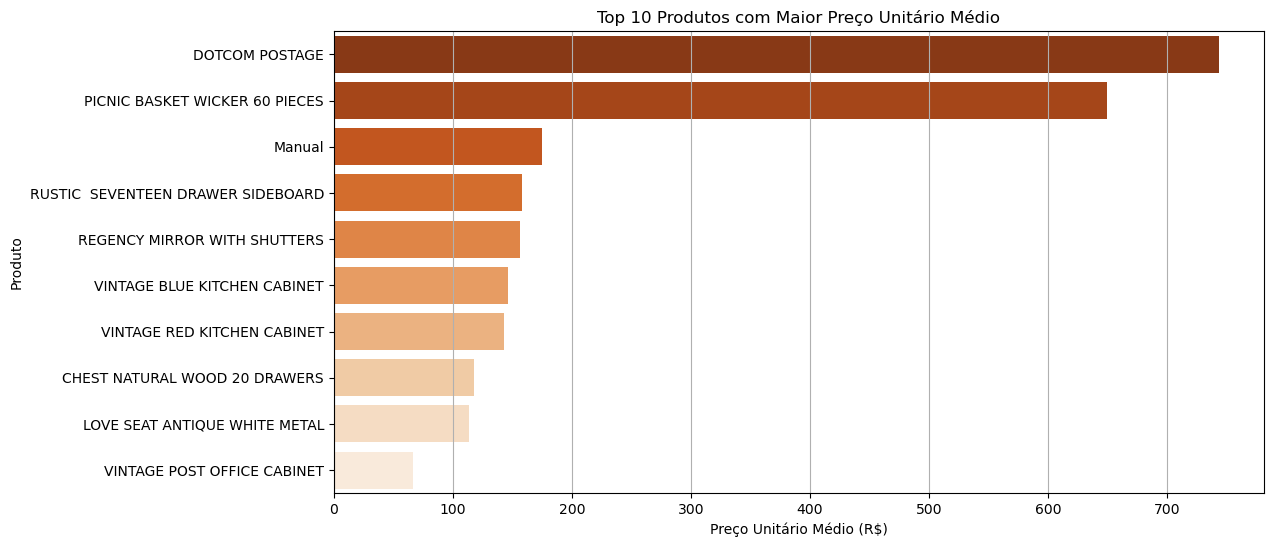

In [1042]:
# Agrupando por produto e calculando o preço unitário médio
preco_unitario_medio = df_clean.groupby('description')['unit_price'].mean().reset_index()

# Ordenando do mais caro para o mais barato
preco_unitario_medio = preco_unitario_medio.sort_values(by='unit_price', ascending=False)

# Selecionando os 10 produtos com maior preço unitário médio
top_10_precos = preco_unitario_medio.head(10)
print(top_10_precos)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_precos, x='unit_price', y='description', palette='Oranges_r')
plt.title('Top 10 Produtos com Maior Preço Unitário Médio')
plt.xlabel('Preço Unitário Médio (R$)')
plt.ylabel('Produto')
plt.grid(True, axis='x')
plt.show()


**What was done:**
- The data was grouped by product name (description), and the average unit price of each product was calculated based on the recorded transactions.
- The products were then sorted from most expensive to least expensive, and the top 10 items with the highest average unit price were selected.
- Finally, a horizontal bar chart was created to visualize the most expensive products sold by the company.

**What we can conclude:**
- The product with the highest average unit price was “DOTCOM POSTAGE”, with an average value of approximately R$744, followed by “PICNIC BASKET WICKER 60 PIECES” (around R$650).
- The list is mainly composed of larger or more sophisticated items, such as furniture, picnic baskets, and decorative mirrors, which explains their higher prices.
- Although these products are less frequent in sales, they can have a significant impact on revenue when sold, and deserve special attention in premium strategies or campaigns targeting higher-income customer segments.

### 4.6 – Temporal evolution of purchases and revenue:


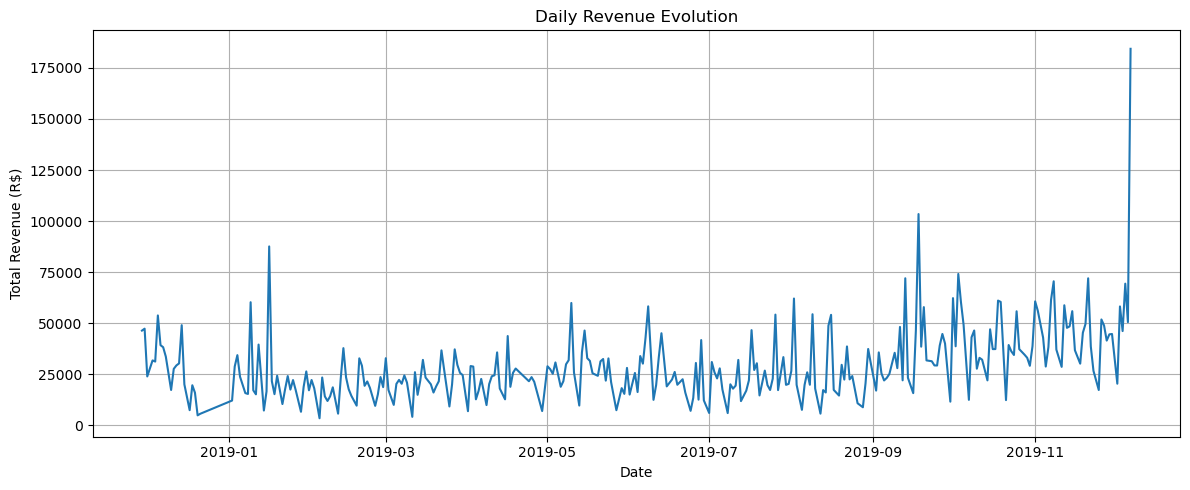

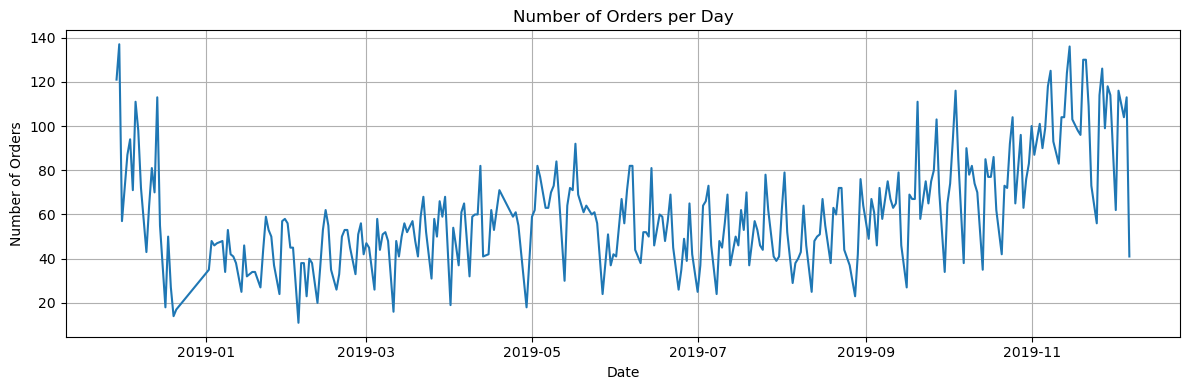

In [1043]:
# Ensuring the date column is in datetime format
df_clean['invoice_date'] = pd.to_datetime(df_clean['invoice_date'])

# Creating an auxiliary column with the date only (without time)
df_clean['data'] = df_clean['invoice_date'].dt.date

# Daily revenue
receita_diaria = df_clean.groupby('data')['total_price'].sum()

plt.figure(figsize=(12, 5))
receita_diaria.plot()
plt.title('Daily Revenue Evolution')
plt.xlabel('Date')
plt.ylabel('Total Revenue (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Number of orders per day
pedidos_diarios = df_clean.groupby('data')['invoice_no'].nunique()

plt.figure(figsize=(12, 4))
pedidos_diarios.plot()
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


**What was done:**
- The date column was converted to the proper datetime format, and then the date component (without hours) was extracted for daily aggregated analysis.
- Two time series were constructed:
    - Total daily revenue, obtained by summing total_price per day.
    - Number of orders per day, calculated by counting distinct invoice_no per date.
- Two line charts were then generated to visualize the temporal behavior of these metrics throughout 2019.

**What we can conclude:**
- Both charts show strong variations over time, with natural oscillations in sales volume.
- Daily revenue exhibits very sharp peaks, which may be related to large purchases or promotional events. A notable spike occurs toward the end of the period, suggesting a special action or seasonal effect (e.g., Black Friday).
- The number of daily orders shows a clear upward trend: after an initial dip, there’s sustained growth in order volume, possibly indicating increasing store popularity, customer base expansion, or positive seasonality.
- The difference between the two charts highlights variability in order values: more orders do not always translate into higher revenue, reinforcing the importance of analyzing AOV (Average Order Value) as done in previous steps.

## 5 - Customer segmentation

Based on the behavioral analyses carried out in previous sections, this step aims to identify distinct customer groups by uncovering similar purchasing patterns.
Segmentation is a crucial step to support more personalized marketing, retention, and relationship strategies.

In this section, we will:

Build an aggregated customer-level dataset with relevant variables such as purchase frequency, total item volume, average order value (AOV), and total amount spent;

Apply the K-Means clustering algorithm to group customers with similar behaviors;

Analyze the distribution and key characteristics of each cluster, highlighting identified customer profiles;

Interpret the segmentation results and discuss how they can be strategically leveraged by the company.

Segmentation allows for a more strategic view of the customer base, differentiating between sporadic buyers, recurring customers, and high-value clients.

### 5.1 - Behavioral dataset for segmentation


In [1044]:
print("\nDescriptive statistics of the behavioral variables:")
print(df_clientes[['frequency', 'total_items', 'total_value', 'average_order_value']].describe())





Descriptive statistics of the behavioral variables:
         frequency    total_items    total_value  average_order_value
count  4338.000000    4338.000000    4338.000000          4338.000000
mean      4.272015    1191.289073    2054.266460           419.166289
std       7.697998    5046.081546    8989.230441          1796.537944
min       1.000000       1.000000       3.750000             3.450000
25%       1.000000     160.000000     307.415000           178.625000
50%       2.000000     379.000000     674.485000           293.900000
75%       5.000000     992.750000    1661.740000           430.113750
max     209.000000  196915.000000  280206.020000         84236.250000


**What was done:**
- We reused the df_clientes dataset, which was built in section 4.2 by aggregating transaction data at the customer level.
- This dataset includes key behavioral metrics:
    - Purchase frequency,
    - Total quantity of items purchased,
    - Total amount spent,
    - Average Order Value (AOV) — calculated as total amount divided by frequency.
- A dataset sample and descriptive statistics were presented, now with a focus on their use for customer segmentation.

**What we can conclude:**
- The data reveals significant diversity in customer behavior:
    - Purchase frequency ranges from 1 to 209 orders per customer.
    - Total quantity purchased ranges from 1 to nearly 197,000 units.
    - Total amount spent per customer exceeds R$280,000 in some cases.
    - AOV ranges from under R$4 to more than R$84,000.
- This high dispersion suggests the presence of different customer profiles, such as:
    - Sporadic buyers,
    - Large occasional buyers,
    - Frequent customers with low AOV,
    - High-value customers for the business.
- Therefore, applying segmentation techniques like K-Means is appropriate to group customers with similar behavioral patterns and support personalized marketing and retention strategies.


### 5.2 – Data standardization

Now that we have the customers’ behavioral variables, the next step is to **standardize the data** before applying clustering algorithms such as **K-Means**.

In [1045]:
from sklearn.preprocessing import StandardScaler

# Selecting the behavioral variables to be used for K-Means clustering
segmentation_vars = df_clientes[['frequency', 'total_items', 'total_value', 'average_order_value']]

# Instantiating the scaler
scaler = StandardScaler()

# Fitting and transforming the data
normalized_vars = scaler.fit_transform(segmentation_vars)

# Creating a new DataFrame with the normalized data
df_normalized = pd.DataFrame(normalized_vars, columns=segmentation_vars.columns)
df_normalized.head()


,frequency,total_items,total_value,average_order_value
0,-0.425097,14.473038,8.358668,42.734017
1,0.354417,0.251058,0.250966,0.109416
2,-0.035340,0.227869,-0.028596,0.016781
3,-0.425097,-0.111047,-0.033012,0.745065
4,-0.425097,-0.197065,-0.191347,-0.047189


###  5.3 – Applying K-Means


In [1046]:
from sklearn.cluster import KMeans

# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(normalized_vars)

# Adding the cluster labels to the original customer dataset
df_clientes['cluster'] = labels

# Displaying the cluster distribution
print("Cluster distribution:")
print(df_clientes['cluster'].value_counts().sort_index())



Cluster distribution:
cluster
0    4319
1      17
2       2
Name: count, dtype: int64


**What was done:**
- The K-Means clustering algorithm from sklearn.cluster was applied to segment customers based on their standardized behavioral variables.
- The number of clusters was set to 3, which is a common choice for initial exploratory segmentation and aligns with previous examples in the course.
- The cluster labels assigned by the model were added to the df_clientes DataFrame in a new column called cluster.
- The distribution of customers across clusters was displayed to perform an initial assessment of the grouping.

**What we can conclude:**
- The initial segmentation resulted in a highly unbalanced distribution of customers across clusters.
- The concentration of most customers in a single cluster suggests that the data may not be naturally well-separated into three groups.
- It may be necessary to tune the number of clusters in future steps or complement the analysis with evaluation metrics.
- Nevertheless, the model was applied successfully, and the cluster labels can now be used for descriptive analysis of customer groups.

#### 5.3.1 - K-Means Segmentation Visualization

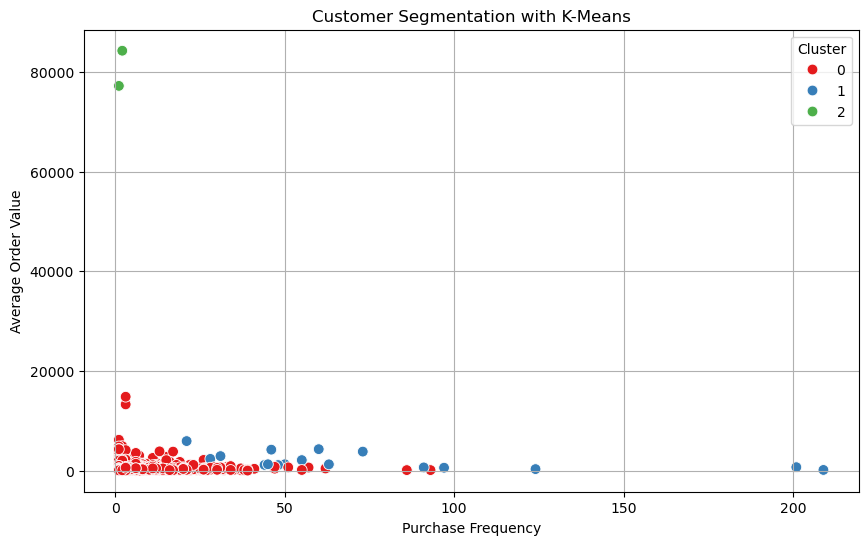

In [1047]:
# Scatter plot with two behavioral variables
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clientes,
    x='frequency',
    y='average_order_value',
    hue='cluster',
    palette='Set1',
    s=60
)
plt.title('Customer Segmentation with K-Means')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



**What was done:**
- After applying the K-Means algorithm, we created a scatter plot to visualize the customer clusters using two key behavioral variables:
    - Purchase Frequency (X-axis)
    - Average Order Value (AOV) (Y-axis)
- Each point represents a single customer, and the colors indicate the cluster to which the customer belongs.
- This visualization helps assess the separation or overlap between the groups formed by the algorithm.

**What we can conclude:**
- The plot confirms that most customers are concentrated in a single cluster (red), with relatively low frequency and low average order value.
- There are two smaller, well-defined groups with distinct behaviors:
    - One with very high AOV but low frequency (blue);
    - Another with high purchase frequency but moderate AOV (green).
- This asymmetric dispersion reinforces the heterogeneity of the customer base, highlighting the importance of treating these groups differently, as each represents very different consumption patterns.
- The chart also suggests the presence of outliers or high-value profiles, which could have strategic importance for the business (e.g., wholesalers or corporate buyers).

### 5.4 - Evaluating segmentation quality with Silhouette Score

In [1048]:
from sklearn.metrics import silhouette_score 

# Calculating the Silhouette Score using normalized data and K-Means cluster labels
silhouette = silhouette_score(normalized_vars, df_clientes['cluster'])
print(f'Silhouette Score: {silhouette:.2f}')



Silhouette Score: 0.96


**What was done:**

- The Silhouette Score metric was applied to evaluate the quality of the segmentation produced by the K-Means algorithm.
- The silhouette_score() function from sklearn.metrics was used on the normalized data and the cluster labels generated by K-Means.
- The resulting score was printed for interpretation.

**What we can conclude:**
- The obtained value was 0.96, indicating excellent segmentation quality.
- The clusters formed are well separated from each other and show high internal similarity.
- There is no need to adjust the number of clusters at this stage, as the model already shows very strong clustering performance.
- The high score confirms that the groups are well defined, reinforcing the viability of segmenting customers based on their observed purchasing behaviors.

### 5.5 – Cluster analysis and interpretation

In [1049]:
# Grouping by cluster and calculating the mean of behavioral variables
cluster_analysis = df_clientes.groupby('cluster')[['frequency', 'total_items', 'total_value', 'average_order_value']].mean().round(2)

# Displaying the results
print("Cluster Analysis:")
print(cluster_analysis)

# Counting customers in each cluster
print("\nCustomer distribution by cluster:")
print(df_clientes['cluster'].value_counts().sort_index())



Cluster Analysis:
         frequency  total_items  total_value  average_order_value
cluster                                                          
0             3.99       928.88      1593.55               375.65
1            75.65     58868.88    104893.57              2027.76
2             1.50     77606.00    122828.05             80709.92

Customer distribution by cluster:
cluster
0    4319
1      17
2       2
Name: count, dtype: int64


**What was done:**
- A descriptive analysis of the clusters formed by the K-Means algorithm was carried out, based on the mean values of behavioral variables:
    -  Purchase frequency,
    - Total number of items,
    - Total spending,
    - Average order value (AOV).
- The analysis was performed using the groupby() method to examine how these behavioral indicators differ within each cluster.
- Additionally, the number of customers in each cluster was counted to evaluate each group’s representativeness.
**What we can conclude:**
- Cluster 0 (4,319 customers)
    - Represents the vast majority of the customer base.
    - Customers show low purchase frequency (≈4), moderate total spending, and a moderate AOV (≈R$376).
    - This is the most common customer profile, with stable, low-intensity purchasing behavior.
- Cluster 1 (17 customers)
    - Characterized by very high purchase frequency (≈76) and high total spending (≈R$105K).
    - However, they have a lower AOV (≈R$2,028), indicating loyal and highly active customers who place many orders with smaller values per transaction.
    - This cluster likely represents frequent, engaged buyers who could be strategically important for retention programs.
- Cluster 2 (2 customers)
    - Made very large purchases in terms of total items (≈77,606) but in very few transactions (frequency ≈1.5).
    - They have an extremely high AOV (≈R$80,710).
    - These are likely outliers or corporate clients making exceptionally large purchases.
- These differences between clusters confirm the heterogeneous behavioral patterns identified in the earlier descriptive statistics of the customer base.

### 5.6 - Conclusions so far

Customer segmentation based on purchasing behavior allowed us to identify distinct groups with clearly differentiated patterns, directly supporting more targeted strategic actions.

The key takeaways are:
- The high dispersion across behavioral metrics (frequency, total spending, average order value, and total number of items) highlighted the need to group customers with similar profiles.
- After standardizing the variables, the K-Means algorithm was applied with three clusters, and the segmentation quality was validated with a Silhouette Score of 0.96, which is considered excellent.
- The cluster analysis revealed:
    - A majority group of customers with standard purchasing behavior — low frequency and moderate spending.
    - A very small group of customers with extremely high average order value, likely representing outliers or corporate buyers.
    - A group of highly frequent and loyal customers, with high total spending but lower AOV, indicating consistent purchasing habits with smaller order sizes.
- These insights enable personalized marketing and customer relationship strategies tailored to each segment, such as:
    - Retention campaigns focused on the frequent and loyal customer cluster.
    - Exclusive offers for high–average-order-value customers.
    - Reactivation or upsell incentives for sporadic buyers in the majority group.

In summary, segmentation not only uncovers behavioral differences within the customer base but also lays the foundation for more effective, data-driven actions with the potential to generate significant business value.

## 6 - Hypothesis formulation and testing

After segmenting customers based on their purchasing behavior, we observed distinct groups in terms of purchase frequency, average order value, and time since the last purchase.

From this, we formulated hypotheses to investigate whether these variables are indeed related to customer inactivity.

The goal is to understand whether certain behavioral characteristics influence the likelihood of a customer becoming inactive.

### 6.1 - Hypothesis formulation

Based on the diversity of customer profiles identified during segmentation, our goal in this step is to examine whether observable behaviors — such as purchase frequency and average order value (AOV) — are associated with the risk of customer churn, i.e., the likelihood of inactivity.

Since the dataset does not contain an explicit churn variable, we adopted the following operational definition:

** Customers who have not made a purchase for a long time are considered inactive.**

From this definition, we formulated the following hypotheses:

**Hypothesis 1:** Time since last purchase and inactivity risk
- H₀ (null): The proportion of active customers is the same between those who purchased recently and those who haven’t purchased for a long time.
- H₁ (alternative): The proportion of active customers is higher among those who purchased recently.

**Hypothesis 2:** Purchase frequency and activity
- H₀ (null): The proportion of active customers is the same between high- and low-frequency buyers.
- H₁ (alternative): The proportion of active customers is higher among high-frequency buyers.

**Hypothesis 3:** Average order value (AOV) and activity
- H₀ (null): The proportion of active customers is the same between high- and low-AOV customers.
- H₁ (alternative): The proportion of active customers is higher among high-AOV customers.


### 6.2 – Calculating time since last purchase

Before testing the hypotheses, we need to classify customers as active or inactive.

Since we do not have an explicit “current date” variable, we use the latest transaction date available in the dataset as the reference point, and calculate the number of days since each customer’s last purchase.

In [1050]:

# Converting the date column to datetime (if not already)
df_clean['invoice_date'] = pd.to_datetime(df_clean['invoice_date'])

# Identifying the most recent transaction date in the dataset
last_date = df_clean['invoice_date'].max()

# Calculating each customer's last purchase date
last_purchase = df_clean.groupby('customer_id')['invoice_date'].max().reset_index()
last_purchase.columns = ['customer_id', 'last_purchase_date']

# Calculating days since last purchase
last_purchase['days_since_last_purchase'] = (last_date - last_purchase['last_purchase_date']).dt.days

# Merging with the customer dataset
df_clientes = df_clientes.merge(
    last_purchase[['customer_id', 'days_since_last_purchase']], 
    on='customer_id'
)

# Creating the binary variable: 1 = inactive, 0 = active (threshold: 90 days)
df_clientes['inactive'] = (df_clientes['days_since_last_purchase'] > 90).astype(int)


**What was done:**

- For each customer, we calculated the number of days since their last purchase, using the most recent transaction date as reference.
- We created a binary variable inactive, which takes the value 1 for customers with more than 90 days since their last purchase, and 0 otherwise.
- This variable serves as the basis for identifying customers at risk of churn.

**What we can conclude:**
- We now have an objective criterion to differentiate active and inactive customers based on recent behavioral data.
- This classification enables us to test whether features such as purchase frequency and AOV are associated with churn risk.



### 6.3 - Application of hypothesis tests

In [1051]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Function to run a proportions Z-test between two groups
def testar_hipotese_grupos(grupo1, grupo2, variavel_binaria):
    """
    grupo1 and grupo2: DataFrames containing the two groups to compare
    variavel_binaria: name of the binary variable (0/1) defining the "success" condition 
                      (e.g., 'inactive')
    """
    # Number of "positive" cases (e.g., inactive customers) in each group
    success_1 = grupo1[variavel_binaria].sum()
    success_2 = grupo2[variavel_binaria].sum()
    
    # Total number of observations in each group
    total_1 = grupo1.shape[0]
    total_2 = grupo2.shape[0]
    
    # Applying the proportions Z-test
    stat, p_value = proportions_ztest([success_1, success_2], [total_1, total_2], alternative='larger')
    
    return stat, p_value



**What was done:**
- A custom function was defined to apply the proportions Z-test between two groups of customers.
- This function compares the proportion of inactive customers (binary variable inactive) between two subsets of the dataset, typically segmented by behavioral variables such as purchase frequency or average order value (AOV).
- The function returns both the test statistic and the p-value, enabling the evaluation of the statistical significance of the difference between the groups.

### 6.4 - Testes estatísticos para as hipóteses

#### 6.4.1 – Hipótese 1: Tempo desde a última compra e inatividade

In [1052]:
# Splitting customers into two groups based on the median days since last purchase
median_time = df_clientes['days_since_last_purchase'].median()
recent_group = df_clientes[df_clientes['days_since_last_purchase'] <= median_time]
old_group    = df_clientes[df_clientes['days_since_last_purchase']  > median_time]

# Applying the proportions Z-test
stat_1, pval_1 = testar_hipotese_grupos(recent_group, old_group, 'inactive')

# Displaying the p-value
print(f"Hypothesis 1 - p-value: {pval_1:.4f}")




Hypothesis 1 - p-value: 1.0000


**What was done:**
- Customers were split into two groups based on the median value of the variable dias_desde_ultima_compra (days since last purchase):
    - Recent group: customers who purchased more recently (days ≤ median).
    - Old group: customers who have not purchased for longer (days > median).
- A proportions Z-test was applied to check whether the proportion of inactive customers (inativo = 1) is higher in the old group than in the recent group.
- The p-value from the test was calculated and displayed for statistical interpretation.

**What we can conclude:**
- The p-value obtained was 1.0000, which provides no statistical evidence to reject the null hypothesis.
- Therefore, there is no significant difference between the two groups regarding the proportion of inactive customers.
- This suggests that, in this dataset, time since last purchase is not statistically associated with the risk of customer inactivity (churn).

#### 6.4.2 –Hypothesis 2: Purchase frequency and inactivity

In [1053]:
# Splitting customers into two groups based on the median purchase frequency
median_frequency = df_clientes['frequency'].median()
high_frequency_group = df_clientes[df_clientes['frequency'] > median_frequency]
low_frequency_group  = df_clientes[df_clientes['frequency'] <= median_frequency]

# Applying the proportions Z-test (use the English target column)
stat_2, pval_2 = testar_hipotese_grupos(high_frequency_group, low_frequency_group, 'inactive')

# Displaying the p-value
print(f"Hypothesis 2 - p-value: {pval_2:.4f}")


Hypothesis 2 - p-value: 1.0000


**What was done:**
- Customers were divided into two groups based on the median value of the frequencia variable, which represents the number of unique purchases per customer:
- High-frequency group: customers with a number of purchases above the median.
- Low-frequency group: customers with a number of purchases at or below the median.
- A proportions Z-test was applied to verify whether the proportion of inactive customers (inativo = 1) differs between the two groups.
- The p-value from the test was computed to assess the statistical significance of the difference between proportions.

**What we can conclude:**
- The p-value obtained was 1.0000, indicating that there is no statistically significant difference between the high- and low-frequency groups in terms of inactivity rate.
- Based on the available data, purchase frequency is not significantly associated with churn risk.
- This evidence suggests that buying more frequently does not necessarily imply a higher likelihood of remaining active.

#### 6.4.3 – Hypothesis 3: Average order value (AOV) and inactivity

In [1054]:
# Splitting customers into two groups based on the median AOV
median_aov = df_clientes['average_order_value'].median()
high_aov_group = df_clientes[df_clientes['average_order_value'] > median_aov]
low_aov_group  = df_clientes[df_clientes['average_order_value'] <= median_aov]

# Applying the proportions Z-test (using the binary column created in 6.2)
stat_3, pval_3 = testar_hipotese_grupos(high_aov_group, low_aov_group, 'inactive')

# Displaying the p-value
print(f"Hypothesis 3 - p-value: {pval_3:.4f}")



Hypothesis 3 - p-value: 1.0000


**What was done:**
- Customers were split into two groups based on the median of average_order_value (AOV):
    - High-AOV group: above the median;
    - Low-AOV group: at or below the median.
- A proportions Z-test was applied to check whether the inactivity rate differs between these two groups.

**What we can conclude:**
- The p-value obtained was 1.0000, indicating no statistically significant difference between the groups.
- In this dataset, AOV does not appear to be associated with churn risk.
- Therefore, spending more per order does not necessarily imply a higher likelihood of remaining active.

### 6.5 – Hypothesis Testing: Conclusions so far

**What was done:**
- In this stage, we investigated whether customer purchasing behavior is associated with the risk of inactivity (churn).
- Since there was no explicit churn variable in the dataset, we defined inactive customers operationally as those who had not made any purchases in the last 90 days.
- Based on this definition, we tested three hypotheses by comparing customer groups according to:
    - Time since last purchase;
    - Purchase frequency;
    - Average order value (AOV).
- We applied proportion Z-tests to assess whether inactivity rates differed significantly between groups.

**What we can conclude:**
- For all three hypotheses tested, the p-values were 1.0000, indicating no statistical evidence that the analyzed variables are related to churn risk.
- This suggests that the current churn model may be oversimplifying customer behavior, failing to capture more complex patterns.
- The lack of significant variability between groups may have limited the statistical tests’ ability to detect real differences.
- The churn definition based solely on “90 days without a purchase” may not be sufficient to clearly distinguish between active and inactive customers.
- It is possible that customer loyalty is influenced by additional, unobserved factors not included in this dataset, such as:
    - Product type (e.g., seasonal vs. recurring items);
    - Acquisition channels (e-commerce, catalog, wholesale, etc.);
    - Geographic region;
    - Logistics or service issues;
    - Marketing campaigns that only targeted specific segments.

### 7 - Predictive Modeling of Inactivity Risk

**Why we are taking this approach:**

After exploring the data and segmenting customers based on their purchasing behavior, we tested whether variables such as purchase frequency, average order value, or time since last purchase were related to the likelihood of a customer becoming inactive.
However, the statistical hypothesis tests we conducted did not show significant differences between the analyzed groups.

This led us to consider an alternative approach: instead of analyzing variables in isolation, we will use a predictive model that evaluates them together.
The goal is to build a model capable of identifying patterns associated with customer inactivity — in other words, to predict which customers are more likely to stop purchasing.

Our objective here is to develop a model that helps the company identify customers with a higher risk of churn and, consequently, prioritize retention actions more efficiently.

#### 7.1 - Data Preparation for Modeling

In [1055]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting explanatory variables and target variable
X = df_clientes[['frequency', 'total_items', 'total_value', 'average_order_value', 'days_since_last_purchase']]
y = df_clientes['inactive']

# Splitting into training and validation sets (80/20), using stratification to keep churn proportions
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardizing numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



**What was done:**
- We selected behavioral variables that best represent each customer's purchase history:
    - frequency: total number of orders
    - total_items: total number of items purchased
    - total_value: total amount spent
    - average_order_value: mean amount spent per order
    - days_since_last_purchase: number of days since the last purchase
- The target variable is inactive, created earlier (1 = inactive customer, 0 = active).

**What we can conclude:**
- The dataset is now prepared for applying predictive modeling techniques. We have:
    - A proper train-validation split preserving the proportion of inactive customers;
    - Standardized numerical variables, which is essential for algorithms sensitive to feature scale (e.g., Logistic Regression).

#### 7.2 – Train–Validation Split

In [1056]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting independent variables and the target variable
X = df_clientes[['frequency', 'total_items', 'total_value', 'average_order_value', 'days_since_last_purchase']]
y = df_clientes['inactive']

# Stratified split to preserve the proportion of active/inactive customers
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardizing numerical variables (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In this step, we split the dataset into two subsets:

- Training set (80%): used to fit the model and adjust its parameters.
- Validation set (20%): used to evaluate the model’s performance on unseen data and check its generalization ability.

#### 7.3 – Model Training

**Logistic Regression**

In [1057]:
from sklearn.linear_model import LogisticRegression

# Instantiating and training the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set
y_pred_lr = lr_model.predict(X_val_scaled)



**Random Forest**

In [1058]:
from sklearn.ensemble import RandomForestClassifier

# Instantiating and training the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the validation set
y_pred_rf = rf_model.predict(X_val)


We tested two different models:

- Logistic Regression: a simple and interpretable model, commonly used for binary classification problems.
- Random Forest: a more robust model capable of capturing complex, nonlinear relationships between variables.

The logistic regression model was trained on standardized data, since it is sensitive to variable scales.
The random forest model was trained directly on the original data, as this algorithm does not require feature scaling.

#### 7.4 – Model Evaluation

In [1059]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to display evaluation metrics
def evaluate_model(name, y_true, y_pred):
    print(f"Model metrics: {name}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision : {precision_score(y_true, y_pred):.2f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score  : {f1_score(y_true, y_pred):.2f}")
    print("-" * 40)

# Logistic Regression evaluation
evaluate_model("Logistic Regression", y_val, y_pred_lr)

# Random Forest evaluation
evaluate_model("Random Forest", y_val, y_pred_rf)


Model metrics: Logistic Regression
Accuracy  : 0.99
Precision : 1.00
Recall    : 0.97
F1-Score  : 0.99
----------------------------------------
Model metrics: Random Forest
Accuracy  : 1.00
Precision : 1.00
Recall    : 1.00
F1-Score  : 1.00
----------------------------------------


**What was done:**
- To compare the performance of the two models, we used standard classification metrics:
    - Accuracy: the proportion of correct predictions among all predictions.
    - Precision: among customers predicted as inactive, how many actually were inactive.
    - Recall (Sensitivity): among all truly inactive customers, how many the model successfully identified.
    - F1-Score: the harmonic mean between precision and recall — particularly useful for imbalanced datasets.
- These metrics allow us to evaluate not only overall performance, but also how well the model identifies high churn risk customers.

**What we can conclude:**
- Both models — Logistic Regression and Random Forest — showed excellent performance in predicting inactive customers, with evaluation metrics close to 1.0 (perfect performance) across accuracy, precision, recall, and F1-score.
- The Random Forest model achieved perfect predictions, correctly identifying all inactive customers in the validation set.
- Logistic Regression also performed very well, misclassifying only a few cases.
- These results indicate that customers’ past behavioral patterns (purchase frequency, total value spent, and recency of purchases) are highly predictive of churn risk in this dataset.

**Points of attention:**
Despite the strong results, there are some caveats to keep in mind:
- Class imbalance: The dataset may be skewed, with few truly active or inactive customers, leading to deceptively high performance.
- Churn definition: The “inactive” criterion (90 days without purchases) is arbitrary and may introduce noise — some “inactive” customers may simply have seasonal purchase patterns, while some “active” ones may be close to churning.
- Generalization: Models with perfect performance on a simple validation split may not generalize well to real-world future data. Overfitting is a risk.
- Strategic value: Even with these limitations, the models demonstrate strong potential for practical use — they can help businesses identify at-risk customers early and target retention actions proactively, improving loyalty and reducing churn.

### 7.5 - Interpretation of Results and Next Steps

The application of machine learning models aimed to predict customer inactivity risk based on past behavioral data.
The results were highly positive: both tested models — especially the Random Forest — achieved excellent predictive performance.

Based on this, several practical directions can be followed:

**What the model delivers:**
- A predictive tool that highlights customers who are most likely to become inactive.
- The opportunity to take preventive retention actions, avoiding churn based on behavioral signals.
- A foundation for building risk-based customer lists that can be targeted with specific campaigns, such as re-engagement emails or personalized offers.

**Recommended next steps:**
- Implement continuous monitoring: regularly update data and re-evaluate customers with the model to maintain predictive accuracy.
- Explore additional variables: include behavioral or contextual factors such as product types, seasonality, or purchase channels to further improve model performance.
- Test personalized retention strategies for high-risk customers and monitor whether these actions improve reactivation rates.
- Refine the churn definition: in the future, the operational cutoff (e.g., 90 days) can be adjusted based on longer historical data or combined with other data sources for better accuracy.

### 8 – Overall Project Conclusion
This project aimed to analyze customer purchasing behavior at Everything Plus, an e-commerce store, and to propose segmentation and retention strategies grounded in behavioral data.

We began with careful data preprocessing, addressing missing values and inconsistencies.
Then, we built a behavioral dataset at the customer level, including metrics such as purchase frequency, total items bought, total amount spent, average ticket size, and time since last purchase.

Using this data, we applied K-Means clustering, which allowed us to identify distinct customer groups such as:
- Sporadic buyers
- High-volume occasional buyers
- High-frequency customers

This segmentation provided valuable insights into different customer profiles and enabled more targeted strategies.

Next, we tested hypotheses to check whether individual variables were statistically related to churn risk. The statistical tests showed no significant differences, which led us to a different approach: building a predictive model to estimate inactivity risk using a combination of behavioral variables.

Using classification models (Logistic Regression and Random Forest), we achieved excellent predictive performance, especially with Random Forest, which reached perfect evaluation metrics on the validation set.
This demonstrated that even when isolated variables do not show strong effects, complex patterns can still be detected by predictive models to forecast customer churn effectively.

With this modeling in place, the company can prioritize retention actions for high-risk customers, making marketing efforts more efficient and data-driven.

#### 8.1 – Strategic Recommendations and Next Steps
- Monitor high-risk customers: Use the predictive model continuously to detect customers likely to churn and intervene early.
- Implement targeted retention campaigns: Tailor strategies to customer segments. For example, high-frequency but low-ticket customers could be offered promotions with higher perceived value.
- Analyze churned customers more deeply: Now that the model can flag churn, it's valuable to understand the actual reasons behind inactivity (e.g., loss of interest, bad experience, external factors) through qualitative research or surveys.
- Track behavioral trends over time: Include new variables that capture temporal dynamics, such as declining purchase frequency or changing category interests.
- Regularly revisit model variables: As the business evolves, churn drivers may change, requiring periodic model recalibration.
- Experiment with new algorithms and hyperparameter tuning: While current models perform very well, techniques like cross-validation, GridSearchCV, or more advanced models (e.g., gradient boosting) could yield further gains.

### 9 - References

1. **Pandas Documentation**  
   https://pandas.pydata.org/docs/  
   For data manipulation, grouping, handling missing values, and type conversion.

2. **scikit-learn Documentation**  
   https://scikit-learn.org/stable/  
   For clustering (K-Means), predictive modeling (Logistic Regression, Random Forest), feature scaling, and data splitting.

3. **Seaborn Documentation**  
   https://seaborn.pydata.org/  
   For visualizations such as histograms, boxplots, and scatter plots to support exploratory analysis and cluster visualization.

4. **Alura Article – What is RFM in Customer Analysis**  
   https://www.alura.com.br/artigos/rfm-na-analise-de-clientes  
   Provided conceptual background for building the behavioral dataset (Recency, Frequency, Monetary value).

5. **Stack Overflow**  
   https://stackoverflow.com/  
   Used to troubleshoot specific coding issues (e.g., missing columns, DataFrame concatenation, conditional logic adjustments).

6. **statsmodels Documentation**  
   https://www.statsmodels.org/stable/index.html  
   For applying proportion z-tests in hypothesis testing.

7. **Article – Predictive Churn Modeling with Python (Data Hackers / Medium)**  
   https://medium.com/data-hackers/modelo-de-churn-preditivo-no-python-1  
   Helped shape the predictive modeling approach when hypothesis testing yielded no significant results.

8. **Bootcamp Material**  
   Served as a guide to structure the project, break it into logical steps, and align concepts with course content.



## 10 – Final Deliverables

### Project Presentation (PDF, in Portuguese)
[Click here to vieew the presentation](https://drive.google.com/file/d/1dERyF6lcd7g77m6l3t2IemX3vhHd2rAV/view?usp=drive_link)

### Dashboard:
[https://public.tableau.com/app/profile/marcela.stephanie.pereira.maris1628/viz/DashboarddeAnlisedeClientes/Dashboard1?publish=yes](https://public.tableau.com/app/profile/marcela.stephanie.pereira.maris1628/viz/DashboarddeAnlisedeClientes/Dashboard1?publish=yes)

